In [1]:
from earthkit.data import cache, config

config.set("cache-policy", "off")

In [2]:


import earthkit.data as ekd

ds_fc = ekd.from_source("sample", "fc_storm_st_jude.grib") # hi-res forecast
ds_en = ekd.from_source("sample", "ens_storm_st_jude.grib") # ensemble forecast



In [3]:
ds_fc.ls()


,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,10fg3,surface,0,20131025,0,69-72,fc,0,regular_ll
1,ecmf,10fg3,surface,0,20131025,0,75-78,fc,0,regular_ll
2,ecmf,10fg3,surface,0,20131025,0,81-84,fc,0,regular_ll
3,ecmf,z,isobaricInhPa,850,20131025,0,72,fc,0,regular_ll
4,ecmf,z,isobaricInhPa,850,20131025,0,78,fc,0,regular_ll
5,ecmf,z,isobaricInhPa,850,20131025,0,84,fc,0,regular_ll


In [4]:
# select windgust fields and convert them to Xarray
ds_fg = ds_en.sel(param="10fg3")
fg = ds_fg.to_xarray()

# compute ensemble mean and spread
fg_mean = fg.mean(dim="number")
fg_spread = fg.std(dim="number")

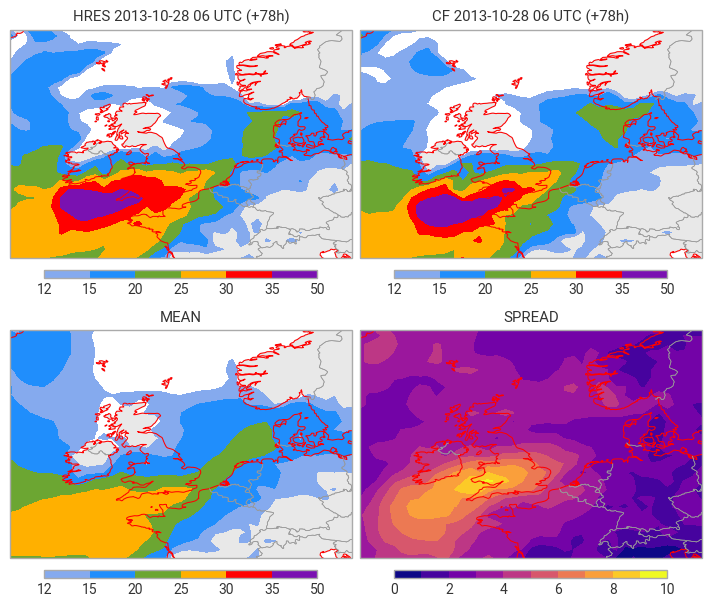

In [8]:
import earthkit.plots 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime

figure = earthkit.plots.Figure(crs=ccrs.PlateCarree(), 
                               domain=[-15,15,65,45], size=(7, 6), rows=2, columns=2)

gust_style = earthkit.plots.styles.Style(
    colors=["#85AAEE", "#208EFC", "#6CA632", "#FFB000", "#FF0000", "#7A11B1"],
    levels=[12, 15, 20, 25, 30, 35, 50],
    units="m s-1",
)

# the hres forecast, GRIB
subplot = figure.add_map(0, 0)
subplot.contourf(ds_fc.sel(param="10fg3", step=78), style=gust_style)
subplot.title("HRES {time:%Y-%m-%d %H} UTC (+{lead_time}h)")
subplot.legend(label="")

# the control forecast, GRIB
subplot = figure.add_map(0, 1)
subplot.contourf(ds_fg.sel(marsType="cf", step=78), style=gust_style)
subplot.title("CF {time:%Y-%m-%d %H} UTC (+{lead_time}h)")
subplot.legend(label="")

# the ensemble mean, Xarray
subplot = figure.add_map(1, 0)
subplot.contourf(fg_mean.sel(step=datetime.timedelta(hours=78)),  style=gust_style)
subplot.title("MEAN")
subplot.legend(label="")

# the ensemble spread, Xarray
subplot = figure.add_map(1, 1)
subplot.contourf(fg_spread.sel(step=datetime.timedelta(hours=78)))
subplot.title("SPREAD")
subplot.legend(label="")

figure.land()
figure.coastlines(color="red")
figure.borders()

figure.show()


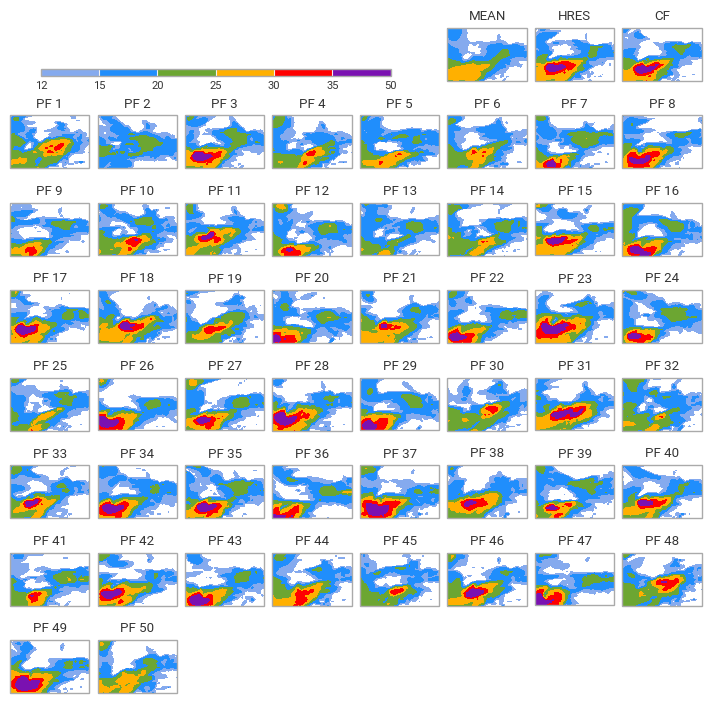

In [7]:
import earthkit.plots 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime

figure = earthkit.plots.Figure(crs=ccrs.PlateCarree(), domain=[-15,15,65,45], size=(7, 7), rows=8, columns=8)

gust_style = earthkit.plots.styles.Style(
    colors=["#85AAEE", "#208EFC", "#6CA632", "#FFB000", "#FF0000", "#7A11B1"],
    levels=[12, 15, 20, 25, 30, 35, 50],
    units="m s-1",
)

gust_style_1 = earthkit.plots.styles.Contour(
    linecolors="black",
    levels=[12, 15, 20, 25, 30, 35, 50],
    linewidths=1,
    labels=False,
    units="m s-1",
)

# ensemble mean, Xarray
subplot = figure.add_map(0, 5)
subplot.contourf(fg_mean.sel(step=datetime.timedelta(hours=78)), style=gust_style)
subplot.title("MEAN")

# HRES forecast, GRIB
subplot = figure.add_map(0, 6)
subplot.contourf(ds_fc.sel(param="10fg3", step=78), style=gust_style)
subplot.title("HRES")

# control forecast, GRIB
subplot = figure.add_map(0, 7)
subplot.contourf(ds_fg.sel(dataType="cf", step=78), style=gust_style)
subplot.title("CF")

# perturbed members, GRIB
for i, f in enumerate(ds_fg.sel(dataType="pf", step=78)):
    subplot = figure.add_map(1+i//8, i%8)
    subplot.contourf(f, style=gust_style)
    subplot.title("PF {number}")

# figure.land()
figure.coastlines()
# figure.borders()

ax = plt.axes((0.05, 0.9, 0.5, 0.01))
legends = figure.legend(ax=ax, label="")
legends[0].ax.tick_params(labelsize=8)

# figure.subplot_titles("{time:%Y-%m-%d %H} UTC (+{lead_time}h)")

# figure.title(
#     "ECMWF Run: {base_time} UTC (+{lead_time}h)\n{variable_name!1}",
#     fontsize=9, horizontalalignment="left", x=0, y=0.96,
# )

figure.show()